<a href="https://colab.research.google.com/github/pratikasarkar/Capstone_Project/blob/pratik_workingBranch/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/gdrive/My Drive/autos.csv',encoding='latin_1')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


## Converting german values to english for all categorical features

In [4]:
df['seller'].value_counts()

privat        371719
gewerblich         3
Name: seller, dtype: int64

In [5]:
df['seller'].replace({'privat':'private',
                      'gewerblich':'commercial'},
                     inplace = True)
df['seller'].head()

0    private
1    private
2    private
3    private
4    private
Name: seller, dtype: object

In [6]:
df['offerType'].value_counts()

Angebot    371710
Gesuch         12
Name: offerType, dtype: int64

In [7]:
df['offerType'].replace({'Angebot':'offer',
                      'Gesuch':'application'},
                     inplace = True)
df['offerType'].head()

0    offer
1    offer
2    offer
3    offer
4    offer
Name: offerType, dtype: object

In [8]:
df['abtest'].value_counts()

test       192683
control    179039
Name: abtest, dtype: int64

In [9]:
df['vehicleType'].value_counts()

limousine     95936
kleinwagen    80077
kombi         67602
bus           30214
cabrio        22911
coupe         19023
suv           14714
andere         3359
Name: vehicleType, dtype: int64

In [10]:
df['vehicleType'].replace({'kleinwagen':'small car',
                      'kombi':'combi',
                      'cabrio':'convertible',
                      'andere' : 'other'},
                     inplace = True)
df['vehicleType'].head()

0          NaN
1        coupe
2          suv
3    small car
4    small car
Name: vehicleType, dtype: object

In [11]:
df['gearbox'].value_counts()

manuell      274355
automatik     77150
Name: gearbox, dtype: int64

In [12]:
df['gearbox'].replace({'manuell':'manual',
                      'automatik':'automatic'},
                     inplace = True)
df['gearbox'].head()

0       manual
1       manual
2    automatic
3       manual
4       manual
Name: gearbox, dtype: object

In [0]:
orig_list = list(df['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']

In [14]:
df['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


In [15]:
df['monthOfRegistration'].value_counts()

0     37695
3     36186
6     33194
4     30939
5     30643
7     28979
10    27354
11    25499
12    25395
9     25083
1     24567
8     23775
2     22414
Name: monthOfRegistration, dtype: int64

In [16]:
df['fuelType'].value_counts()

benzin     223974
diesel     107802
lpg          5379
cng           571
hybrid        281
andere        208
elektro       104
Name: fuelType, dtype: int64

In [17]:
df['fuelType'].replace({'benzin':'petrol',
                      'andere':'other',
                      'elektro':'electric'},
                     inplace = True)
df['fuelType'].head()

0    petrol
1    diesel
2    diesel
3    petrol
4    diesel
Name: fuelType, dtype: object

In [18]:
df['brand'].value_counts()

volkswagen        79672
bmw               40291
opel              40153
mercedes_benz     35339
audi              32889
ford              25584
renault           17988
peugeot           11032
fiat               9677
seat               7023
mazda              5697
skoda              5645
smart              5251
citroen            5185
nissan             5040
toyota             4699
sonstige_autos     3983
hyundai            3649
mini               3397
volvo              3328
mitsubishi         3062
honda              2838
kia                2556
alfa_romeo         2348
suzuki             2330
porsche            2215
chevrolet          1847
chrysler           1454
dacia               900
jeep                808
daihatsu            806
subaru              779
land_rover          772
jaguar              621
trabant             592
daewoo              543
saab                531
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [19]:
df['notRepairedDamage'].value_counts()

nein    263325
ja       36302
Name: notRepairedDamage, dtype: int64

In [20]:
df['notRepairedDamage'].replace({'nein':'No',
                      'ja':'Yes'},
                     inplace = True)
df['notRepairedDamage'].head()

0    NaN
1    Yes
2    NaN
3     No
4     No
Name: notRepairedDamage, dtype: object

In [21]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,petrol,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,Yes,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47


# Exploring the dataset

In [22]:
df.shape

(371723, 20)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371723 entries, 0 to 371722
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371723 non-null  object 
 1   name                 371723 non-null  object 
 2   seller               371722 non-null  object 
 3   offerType            371722 non-null  object 
 4   price                371722 non-null  float64
 5   abtest               371722 non-null  object 
 6   vehicleType          333836 non-null  object 
 7   yearOfRegistration   371722 non-null  float64
 8   gearbox              351505 non-null  object 
 9   powerPS              371723 non-null  int64  
 10  model                351232 non-null  object 
 11  kilometer            371723 non-null  int64  
 12  monthOfRegistration  371723 non-null  int64  
 13  fuelType             338319 non-null  object 
 14  brand                371723 non-null  object 
 15  notRepairedDamage

In [0]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371723 entries, 0 to 371722
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371723 non-null  datetime64[ns]
 1   name                 371723 non-null  object        
 2   seller               371722 non-null  object        
 3   offerType            371722 non-null  object        
 4   price                371722 non-null  float64       
 5   abtest               371722 non-null  object        
 6   vehicleType          333836 non-null  object        
 7   yearOfRegistration   371722 non-null  float64       
 8   gearbox              351505 non-null  object        
 9   powerPS              371723 non-null  int64         
 10  model                351232 non-null  object        
 11  kilometer            371723 non-null  int64         
 12  monthOfRegistration  371723 non-null  int64         
 13  fuelType      

In [26]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:00,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-07-04 03:16:00
1,2016-03-24 10:58:00,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,0,66954,2016-07-04 01:46:00
2,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-05-04 12:47:00
3,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75,golf,150000,6,petrol,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,0,60437,2016-06-04 10:17:00


# Handling missing values

In [27]:
def get_missing_val_count_df(df):
  missing_count_list = []
  for col in df.columns:
    missing_count_list.append(df[col].isnull().sum())
  missing_count_df = pd.DataFrame(missing_count_list,columns=['count'],index = df.columns)
  return missing_count_df.sort_values('count',ascending=False)
get_missing_val_count_df(df)

,count
notRepairedDamage,72096
vehicleType,37887
fuelType,33404
model,20491
gearbox,20218
seller,1
offerType,1
price,1
abtest,1
yearOfRegistration,1


### Price

In [28]:
df['price'].describe()

count    3.717220e+05
mean     1.729044e+04
std      3.587017e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

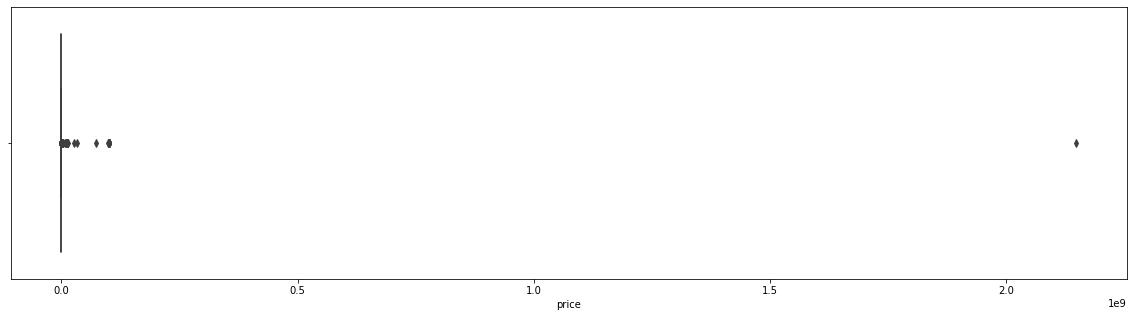

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

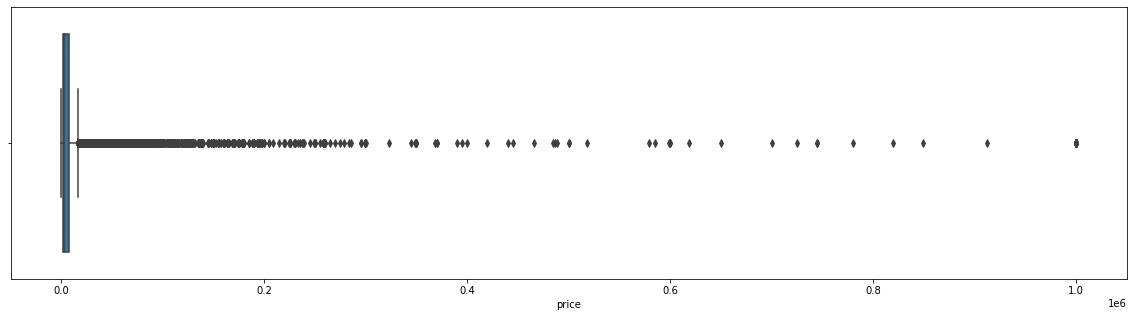

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(df[(df['price']>=100) & (df['price']<=1000000)]['price'])

### Outlier detection using Isolation Forest

In [0]:
dfprice = df[(df['price'].isnull() == False)]['price']

[[0.00000000e+00]
 [5.77712281e+03]
 [1.15542456e+04]
 ...
 [2.14747209e+09]
 [2.14747787e+09]
 [2.14748365e+09]]


Text(0.5, 1.0, 'price')

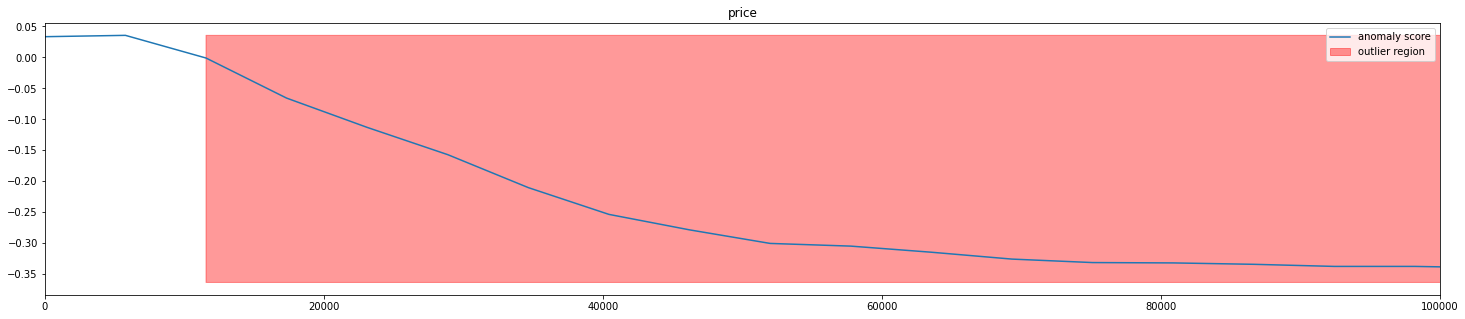

In [32]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(dfprice.values.reshape(-1,1))

xx = np.linspace(dfprice.min(), dfprice.max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(0, 100000)
# plt.axis([0,100000,0,0])
plt.title('price')

If we see from the above plot, almost all data point above 12000 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 80000 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with price below 150 also seem to be very low as far as price of a used car is concerned, so we will also drop those data points which have price below 150.

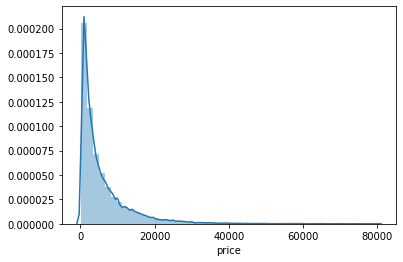

In [33]:
sns.distplot(df[(df['price']>=150) & (df['price']<=80000)]['price'])

In [34]:
df[(df['price']>=150) & (df['price']<=80000)].shape

(356195, 20)

In [0]:
df2 = df[(df['price']>=150) & (df['price']<=80000)]

In [36]:
get_missing_val_count_df(df2)

,count
notRepairedDamage,64418
vehicleType,32418
fuelType,28259
model,17454
gearbox,16240
kilometer,0
postalCode,0
nrOfPictures,0
dateCreated,0
brand,0


### Kilometers
Number of kilometers car has driven

In [37]:
df2['kilometer'].describe()

count    356195.000000
mean     125903.283314
std       39456.377128
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

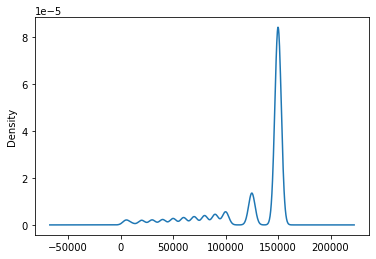

In [38]:
df2['kilometer'].plot(kind = 'density')

In [39]:
print(np.quantile(df2['kilometer'],0.3531))
print(np.quantile(df2['kilometer'],0.3532))

125000.0
150000.0


As we can see, about only 35 percent of the data have kilometers driven less than 125000 and the rest 65 percent of the data value is 150000. This could be due to a default value set to the feature while creating a new ad which the ad creators did not change and kept it as default. So this could be a **DATA COLLECTION ERROR**

In [0]:
df2.loc[df['kilometer'] == 150000,'kilometer'] = np.nan

### NotRepairedDamaged 
If the car has a damage which is not repaired yet

In [41]:
df2['notRepairedDamage'].describe()

count     291777
unique         2
top           No
freq      258630
Name: notRepairedDamage, dtype: object

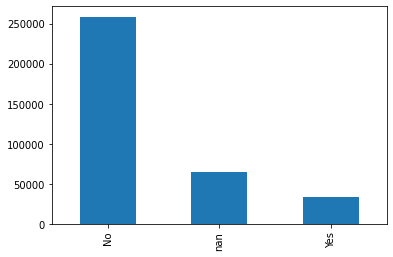

In [42]:
df2['notRepairedDamage'].value_counts(dropna = False).plot(kind = 'bar')

It does have some missing values which we will consider imputing using MICE imouter.

### VehicleType

In [43]:
df2['vehicleType'].describe()

count        323777
unique            8
top       limousine
freq          93327
Name: vehicleType, dtype: object

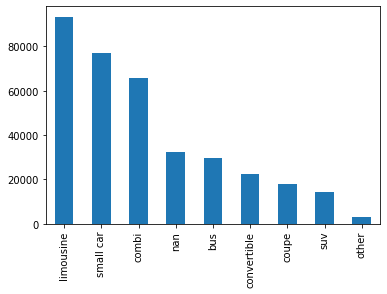

In [44]:
df2['vehicleType'].value_counts(dropna = False).plot(kind = 'bar')

It does have some missing values which we will consider imputing using MICE imouter.

### FuelType

In [45]:
df2['fuelType'].describe()

count     327936
unique         7
top       petrol
freq      215705
Name: fuelType, dtype: object

petrol      215705
diesel      105938
NaN          28259
lpg           5222
cng            555
hybrid         270
other          155
electric        91
Name: fuelType, dtype: int64


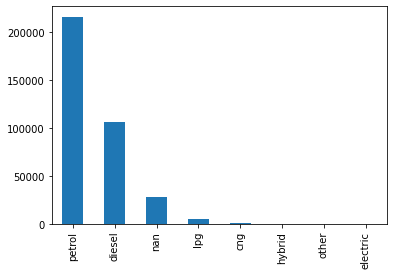

In [46]:
print(df2['fuelType'].value_counts(dropna = False))
df2['fuelType'].value_counts(dropna = False).plot(kind = 'bar')

It does have some missing values which we will consider imputing using MICE imouter.

### Model

In [47]:
df2['model'].describe()

count     338741
unique       251
top         golf
freq       28783
Name: model, dtype: object

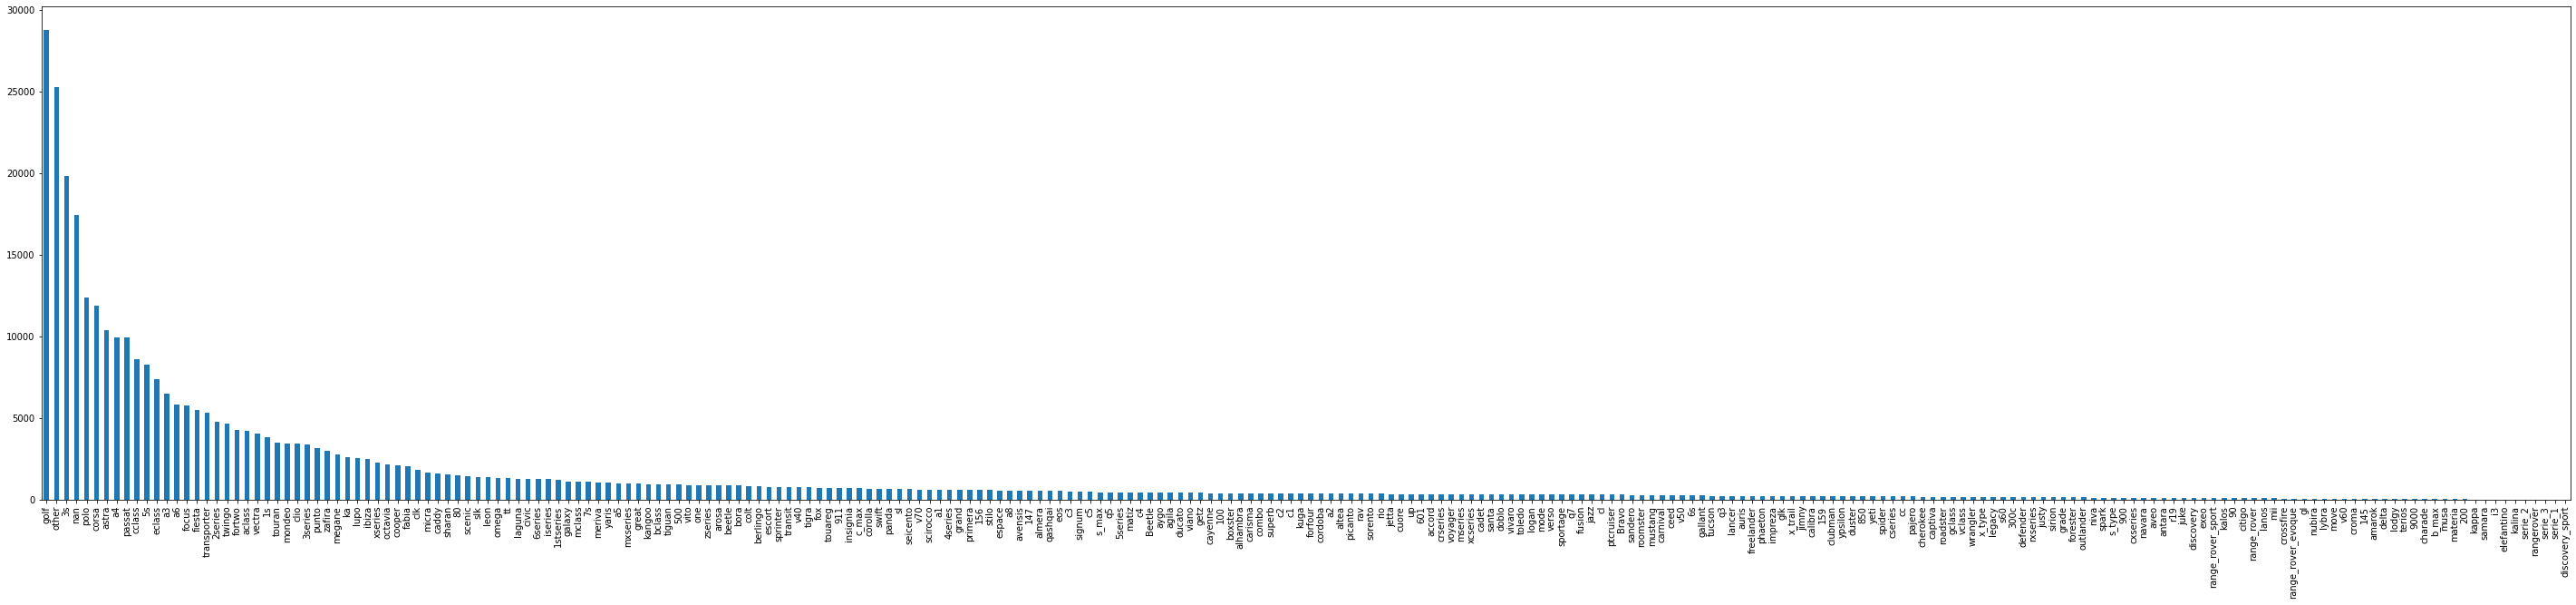

In [48]:
plt.figure(figsize=(50,10))
df2['model'].value_counts(dropna = False).plot(kind = 'bar')

It does have some missing values which we will consider imputing using MICE imouter.

### Gearbox

In [49]:
df2['gearbox'].describe()

count     339955
unique         2
top       manual
freq      264723
Name: gearbox, dtype: object

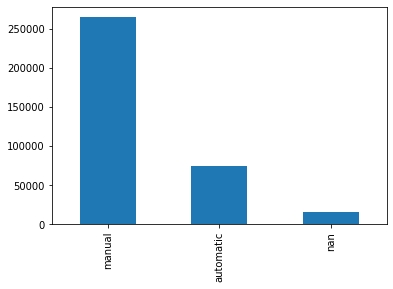

In [50]:
df2['gearbox'].value_counts(dropna = False).plot(kind = 'bar')

It does have some missing values which we will consider imputing using MICE imouter.

### Seller

In [51]:
df2['seller'].describe()

count      356195
unique          2
top       private
freq       356193
Name: seller, dtype: object

private       356193
commercial         2
Name: seller, dtype: int64


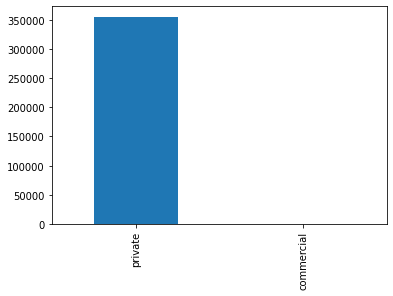

In [52]:
print(df2['seller'].value_counts(dropna = False))
df2['seller'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### OfferType

In [53]:
df2['offerType'].describe()

count     356195
unique         2
top        offer
freq      356189
Name: offerType, dtype: object

offer          356189
application         6
Name: offerType, dtype: int64


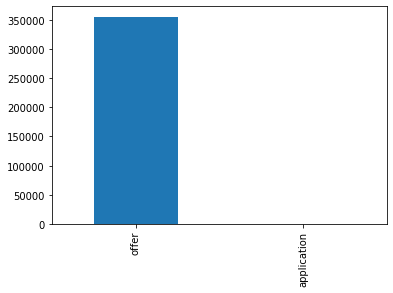

In [54]:
print(df2['offerType'].value_counts(dropna = False))
df2['offerType'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### ABTEST

In [55]:
df2['abtest'].describe()

count     356195
unique         2
top         test
freq      184527
Name: abtest, dtype: object

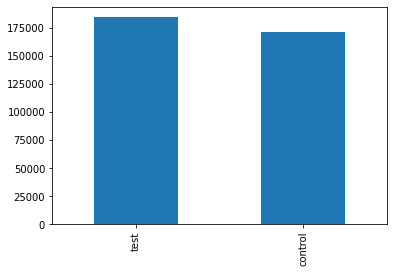

In [56]:
df2['abtest'].value_counts(dropna = False).plot(kind = 'bar')

### Year Of Registration

In [57]:
df2['yearOfRegistration'].describe()

count    356195.000000
mean       2004.331422
std          72.359936
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [0]:
df2.loc[(df2['yearOfRegistration']<1900) | (df2['yearOfRegistration']>2020),'yearOfRegistration'] = np.nan

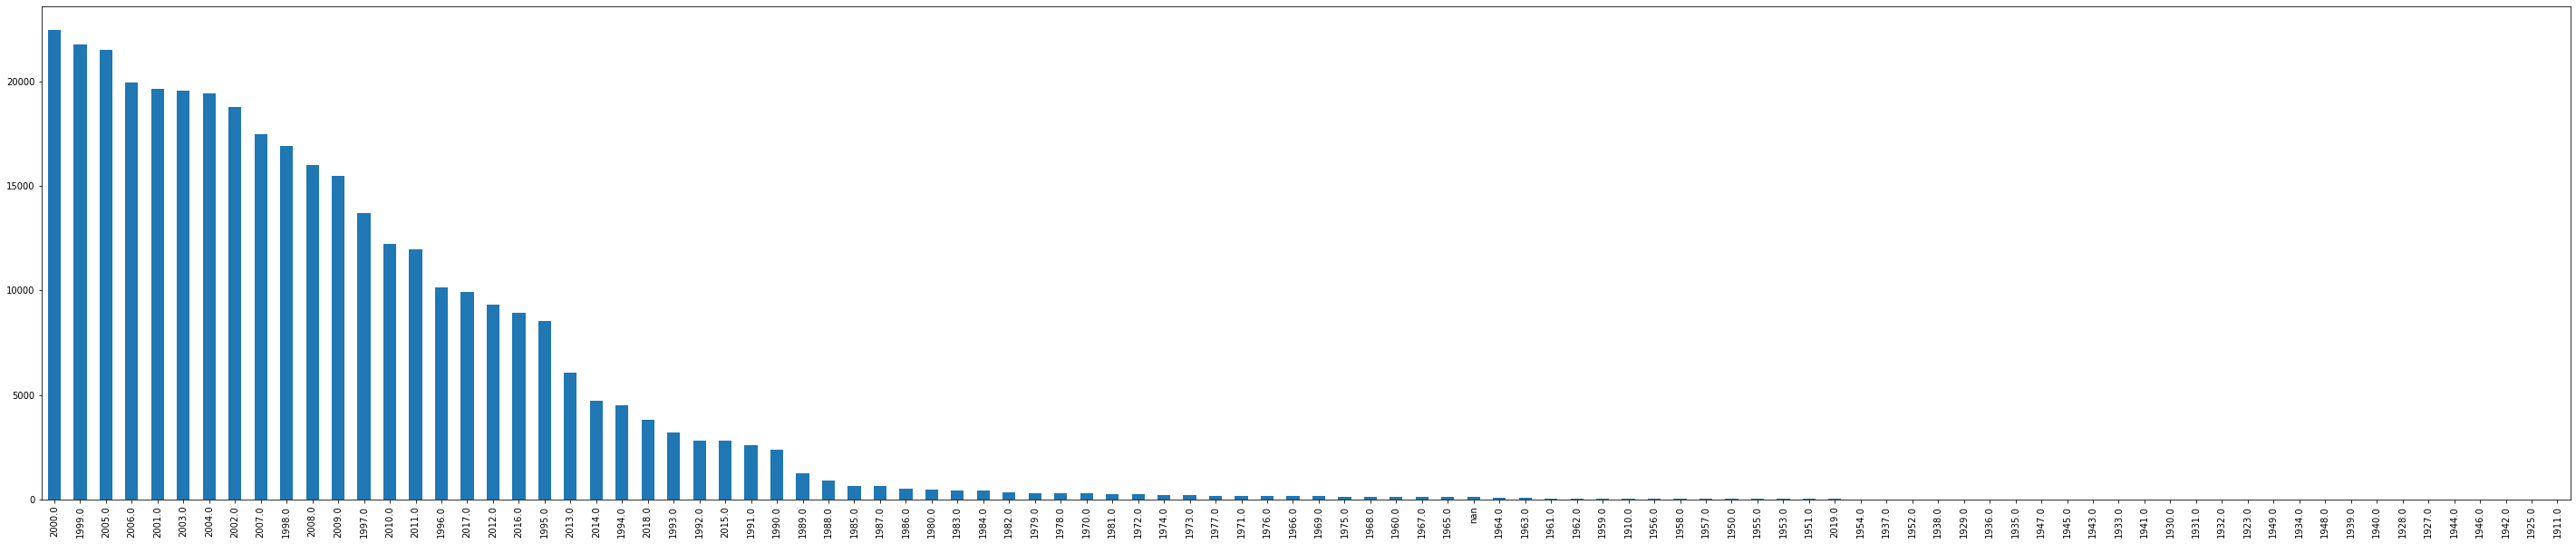

In [59]:
plt.figure(figsize=(50,10))
df2['yearOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

### Power PS

In [60]:
df2['powerPS'].describe()

count    356195.000000
mean        116.867064
std         187.962006
min           0.000000
25%          75.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

[[0.00000000e+00]
 [5.38036490e-02]
 [1.07607298e-01]
 ...
 [1.99998924e+04]
 [1.99999462e+04]
 [2.00000000e+04]]


Text(0.5, 1.0, 'Power PS')

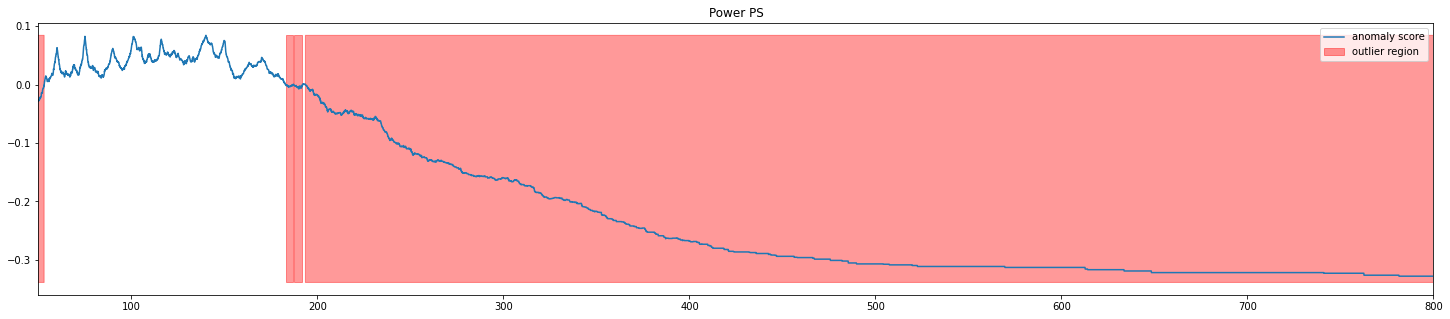

In [61]:
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(df2['powerPS'].values.reshape(-1,1))

xx = np.linspace(df2['powerPS'].min(), df2['powerPS'].max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(50, 800)
plt.title('Power PS')

In [0]:
df2 = df2[(df2['powerPS']<800) & (df2['powerPS']>50)]

### Brand

In [63]:
df2['brand'].describe()

count         310974
unique            40
top       volkswagen
freq           65053
Name: brand, dtype: object

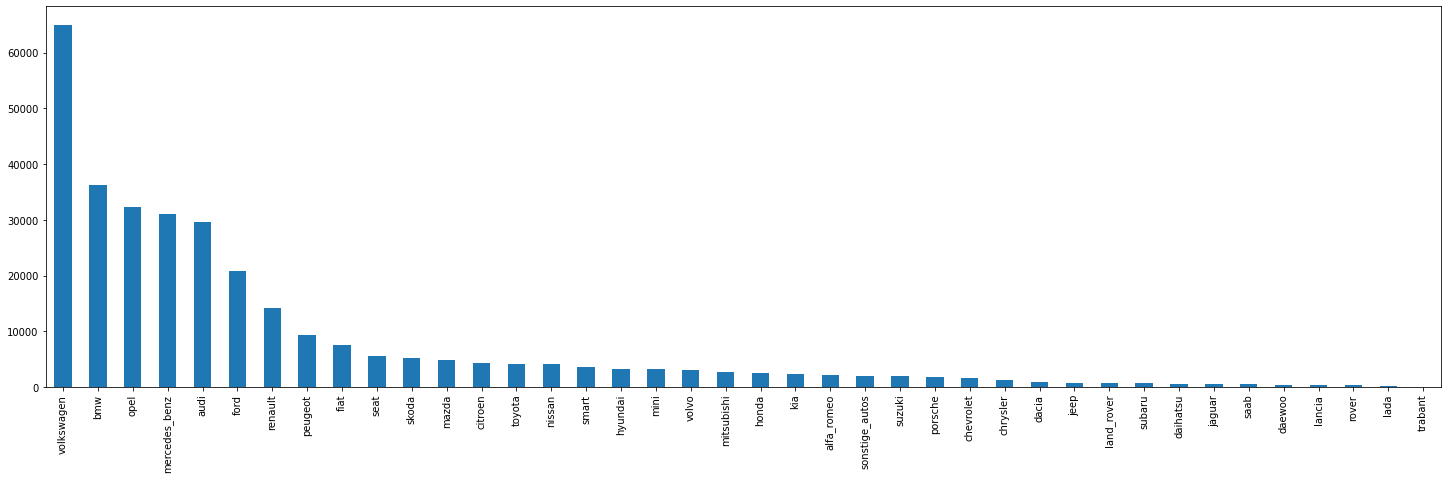

In [64]:
plt.figure(figsize=(25,7))
df2['brand'].value_counts(dropna = False).plot(kind = 'bar')

### Month Of Registration

In [65]:
df2['monthOfRegistration'].describe()

count    310974.000000
mean          6.002177
std           3.576942
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

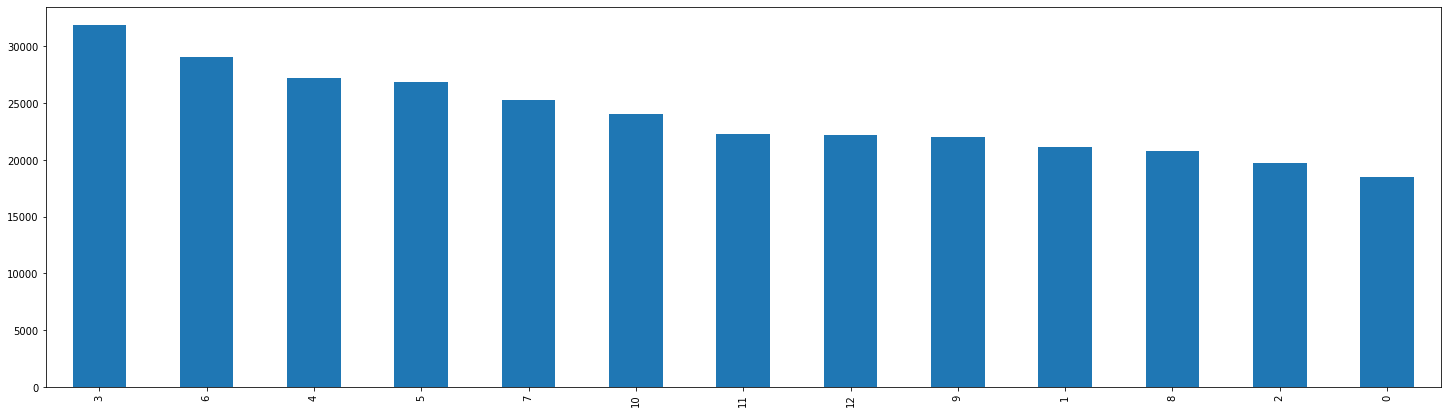

In [66]:
plt.figure(figsize=(25,7))
df2['monthOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [0]:
df2.loc[df2['monthOfRegistration'] == 0,'monthOfRegistration'] = np.nan

### Number of days online

In [0]:
val = list(df2['lastSeen'] - df2['dateCreated'])
days = [obj.days for obj in val]
for i in range(len(days)):
  if days[i] < 0:
    days[i] = np.nan
df2['No_of_days_online'] = days

In [0]:
df3 = df2[['kilometer','notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'yearOfRegistration', 'monthOfRegistration', 'brand', 'powerPS', 'abtest', 'No_of_days_online', 'price']]

In [70]:
df3.head()

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,yearOfRegistration,monthOfRegistration,brand,powerPS,abtest,No_of_days_online,price
1,125000.0,Yes,coupe,diesel,manual,2011.0,5.0,audi,190,test,102.0,18300.0
2,125000.0,NaN,suv,diesel,automatic,2004.0,8.0,jeep,163,test,51.0,9800.0
3,NaN,No,small car,petrol,manual,2001.0,6.0,volkswagen,75,test,0.0,1500.0
4,90000.0,No,small car,diesel,manual,2008.0,7.0,skoda,69,test,65.0,3600.0
5,NaN,Yes,limousine,petrol,manual,1995.0,10.0,bmw,102,test,61.0,650.0


## Imputation

In [0]:
cat_cols = ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'yearOfRegistration', 'monthOfRegistration', 'brand','abtest']

In [0]:
from sklearn.preprocessing import OrdinalEncoder
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}
# Loop over columns to encode
for col_name in cat_cols:
  # Create ordinal encoder for the column
  ordinal_enc_dict[col_name] = OrdinalEncoder()
  # Select the nin-null values in the column
  col = df3[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)
  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
  # Replace the ambience column with ordinal values
  df3.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
Iterative_imputer = IterativeImputer()
df3_MICE = df3.copy(deep=True)
df3_MICE.iloc[:, :] = np.round(Iterative_imputer.fit_transform(df3_MICE))

In [0]:
df3_MICE.loc[df3_MICE['fuelType']>6,'fuelType'] = 6
df3_MICE.loc[df3_MICE['fuelType']<0,'fuelType'] = 0

In [0]:
for col in cat_cols:
  reshaped_col = df3_MICE[col].values.reshape(-1, 1)
  df3_MICE[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [0]:
df_final = df3_MICE